In [1]:
import pandas as pd
import numpy as np
import collections


In [2]:
data = pd.read_csv('2019-Nov.csv')

In [3]:
df = data.sample(n=1000)

In [4]:
#Plausibility values for validation
MIN_PLAUSIBLE_VALUE = -1
MAX_PLAUSIBLE_VALUE = 5000

# Initialize variables to store max, min, sum and count
#max_total = float('-inf')
#min_total = float('inf')
total_sum = 0.0
sumsq=0
count = 0
current_avg = 0
var=0



In [5]:
df.shape[0]

1000

In [6]:
avgarr=[]
vararr=[]

In [7]:
df.head(4)  

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
3699083,2019-11-03 10:38:04 UTC,view,1480558,2053013561092866779,computers.desktop,netechnics,1055.34,516348235,c377fd20-61be-456a-a68f-22aecb5cd918
31555448,2019-11-15 17:53:15 UTC,view,3701390,2053013565983425517,appliances.environment.vacuum,dauscher,46.31,513811740,a5b6bbce-9b9e-4cbf-a766-0b904dc9b938
24233939,2019-11-14 10:34:31 UTC,view,100002750,2053013566209917945,accessories.bag,tonybellucci,118.92,523557286,f2cc7e4c-bd3e-4431-af12-06229703898d
29536681,2019-11-15 11:29:48 UTC,view,1005217,2053013555631882655,electronics.smartphone,xiaomi,150.58,524759146,ace48650-33dc-4f7b-8dbd-79c24c3e5780


In [8]:
import numbers
from heapq import heappush, heappop, heapify
import math

In [9]:
g = []
s = []
median =0

In [10]:
# Iterate over the rows of the dataframe
errorcount  = collections.defaultdict(int)
for index, row in df.iterrows():
    # Access the transactionTotal value from the row
    transaction_total = row['price']
    
    if not transaction_total or not isinstance(transaction_total, numbers.Number):
         errorcount["InvalidNumber"]+=1
         continue
    elif transaction_total < MIN_PLAUSIBLE_VALUE:
         errorcount["SmallNumber"]+=1
         continue
    
    elif transaction_total > MAX_PLAUSIBLE_VALUE:
         errorcount["LargeNumber"]+=1
         continue

    
    # Update max and min
    #max_total = max(max_total, transaction_total)
    #min_total = min(min_total, transaction_total)
    
    # Update sum and count
    total_sum += transaction_total
    count += 1
    sumsq +=(transaction_total*transaction_total)
    
    if count == 1:
          current_avg = transaction_total
          avgarr.append(current_avg)

    # Calculate the average
    else:
        current_avg = ((count-1) * current_avg + transaction_total) / count
        var= (sumsq/count) -(current_avg*current_avg)
        avgarr.append(current_avg)
        vararr.append(var)
        heappush(s, -transaction_total)
        heappush(g, -heappop(s))
        if len(g) > len(s):
            heappush(s, -heappop(g))
 
        if len(g) != len(s):
            median=-s[0]
        else:
            median=(g[0] - s[0])*0.5

    print(f"[#Error] {errorcount}")
    # Print the results for each row
    print(f"[#{index}] Average: {current_avg}, Variance: {var}, Median{median}")

# Print the results for each row
print(f"\n[#Final]Average: {current_avg}, Count: {count}, Variance: {var}, Median{median}")

[#Error] defaultdict(<class 'int'>, {})
[#3699083] Average: 1055.34, Variance: 0, Median0
[#Error] defaultdict(<class 'int'>, {})
[#31555448] Average: 550.8249999999999, Variance: 254535.38522499998, Median46.31
[#Error] defaultdict(<class 'int'>, {})
[#24233939] Average: 406.8566666666666, Variance: 211144.01882222222, Median82.61500000000001
[#Error] defaultdict(<class 'int'>, {})
[#29536681] Average: 342.78749999999997, Variance: 170672.58846874995, Median118.92
[#Error] defaultdict(<class 'int'>, {})
[#3064883] Average: 299.908, Variance: 143892.67685599992, Median123.655
[#Error] defaultdict(<class 'int'>, {})
[#6525239] Average: 269.7866666666667, Variance: 124447.03765555548, Median119.18
[#Error] defaultdict(<class 'int'>, {})
[#12145496] Average: 244.08, Variance: 110633.88568571424, Median119.05000000000001
[#Error] defaultdict(<class 'int'>, {})
[#44599723] Average: 310.06500000000005, Variance: 127282.79154999994, Median119.18
[#Error] defaultdict(<class 'int'>, {})
[#40577

In [11]:
df['category_code'].value_counts()

electronics.smartphone           241
computers.notebook                33
electronics.video.tv              28
appliances.kitchen.washer         28
appliances.environment.vacuum     25
                                ... 
electronics.audio.subwoofer        1
kids.toys                          1
auto.accessories.anti_freeze       1
auto.accessories.parktronic        1
computers.peripherals.mouse        1
Name: category_code, Length: 79, dtype: int64

In [12]:
elements=[]
counter=[]
index=0
g1=[]
s1=[]


In [13]:

for index, row in df.iterrows():
    categories = row['category_code']
    if categories not in elements:
        elements.append(categories)
        counter.append(1)
    else:
       index= elements.index(categories)
       counter[index]+=1
answer = zip(elements,counter)


In [14]:
for idnex, row in df.iterrows():
    categories = row['category_code']
    heappush(s1, -counter[index])
    heappush(g1, -heappop(s1))
    if len(g1) > len(s1):
        heappush(s1, -heappop(g1))
 
    if len(g1) != len(s1):
        median1=-s1[0]
    else:
        median1=(g1[0] - s1[0])*0.5

median1

9.0

In [15]:
for r in answer:
   for c in r:
      print(c,end = " ")
   print()

computers.desktop 9 
appliances.environment.vacuum 25 
accessories.bag 8 
electronics.smartphone 241 
nan 312 
furniture.bedroom.bed 8 
appliances.kitchen.washer 28 
construction.tools.drill 5 
electronics.video.tv 28 
sport.trainer 4 
furniture.living_room.cabinet 5 
electronics.audio.headphone 24 
apparel.shoes 24 
electronics.clocks 23 
auto.accessories.alarm 6 
construction.tools.generator 8 
electronics.audio.music_tools.piano 1 
appliances.kitchen.refrigerators 22 
furniture.living_room.chair 2 
apparel.shoes.keds 9 
electronics.tablet 9 
appliances.environment.water_heater 5 
computers.components.cpu 2 
appliances.kitchen.hob 6 
computers.peripherals.printer 3 
appliances.kitchen.oven 7 
auto.accessories.videoregister 6 
computers.components.videocards 4 
computers.notebook 33 
auto.accessories.player 12 
furniture.living_room.sofa 5 
construction.tools.saw 4 
appliances.environment.air_heater 4 
appliances.kitchen.hood 3 
appliances.kitchen.grill 2 
electronics.video.projector 

In [16]:
import matplotlib.pyplot as plt

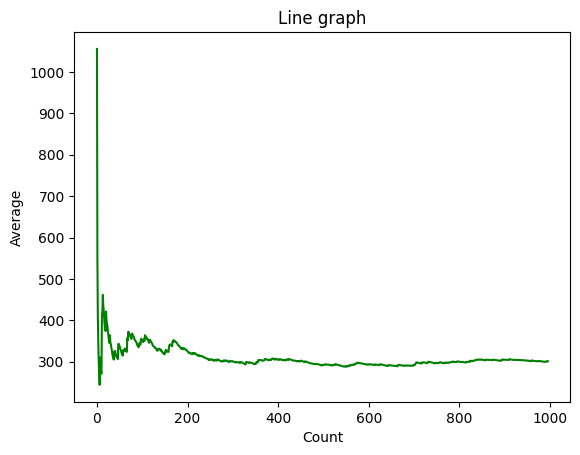

In [17]:
plt.title("Line graph")
plt.xlabel("Count")
plt.ylabel("Average")
x= np.arange(0,count)
plt.plot(x, avgarr, color ="green")
plt.show()

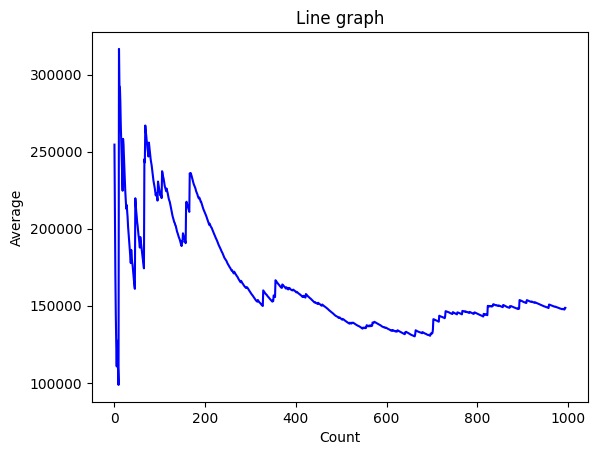

In [18]:
plt.title("Line graph")
plt.xlabel("Count")
plt.ylabel("Average")
x= np.arange(0,count-1)
plt.plot(x, vararr, color ="blue")
plt.show()

In [19]:
import seaborn as sns

In [20]:
counts = df['category_code'].value_counts().reset_index().rename(columns={'index': 'category_code', 'category_code': 'count'})

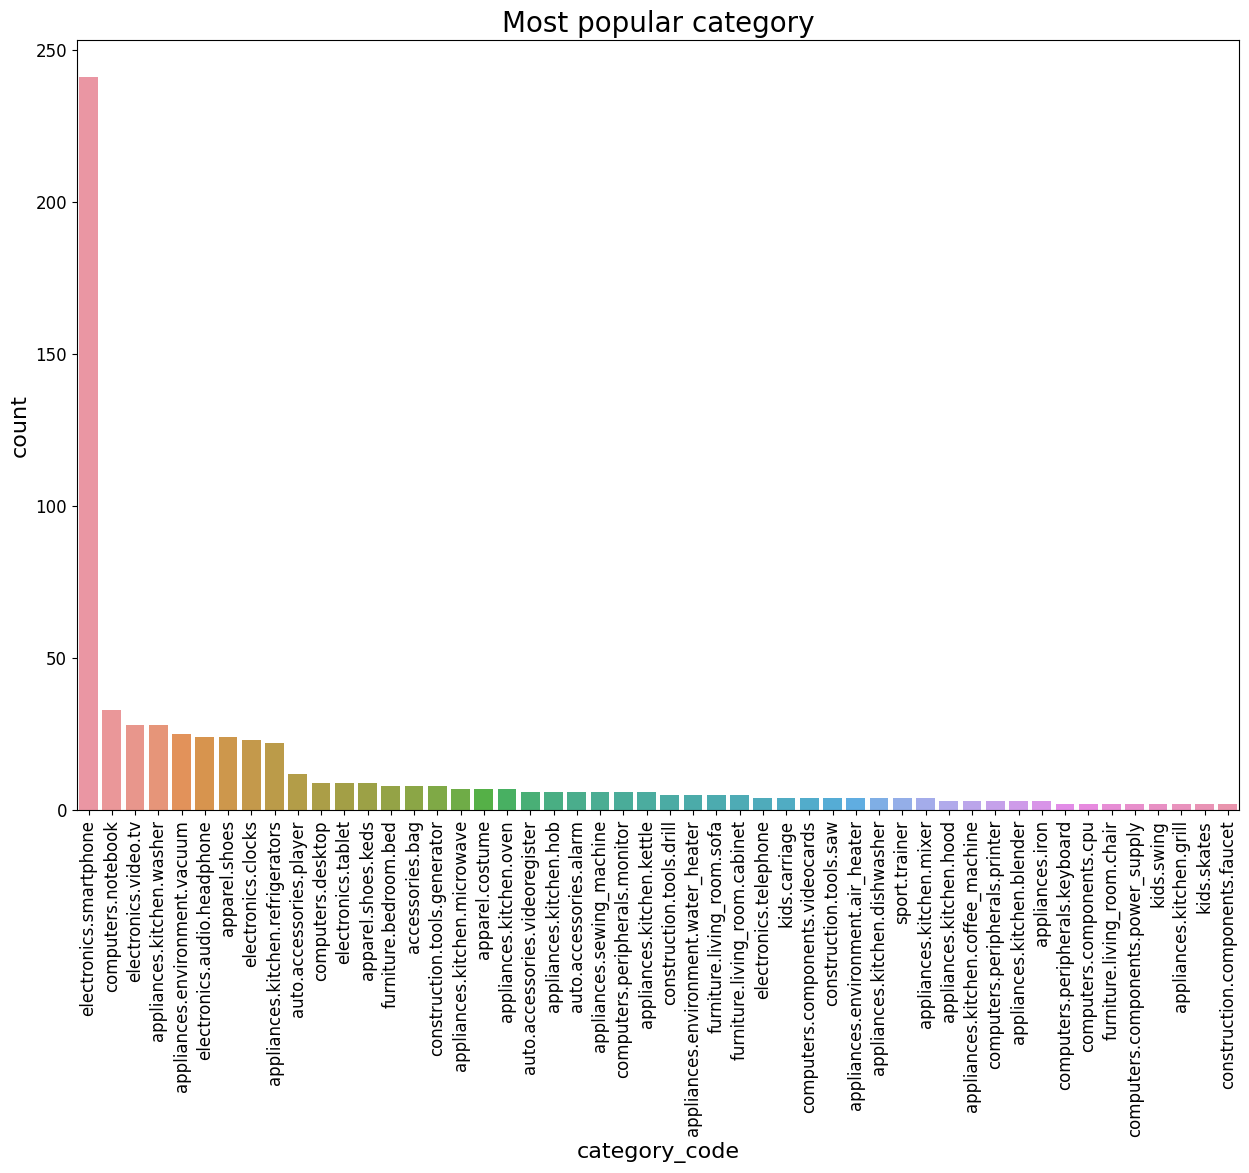

In [21]:
plt.figure(figsize=(15, 10))
sns.barplot(x="category_code", y="count", data = counts, order=counts.sort_values('count', ascending=False)['category_code'].head(50))
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Most popular category", fontsize=20)
plt.xlabel("category_code", fontsize=16)
plt.ylabel("count", fontsize=16)
plt.show()

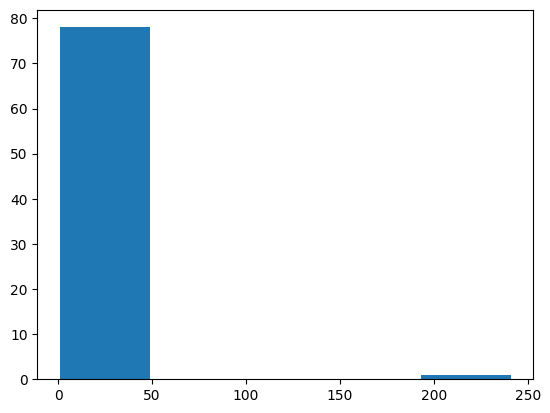

In [29]:
x= df['category_code'].value_counts()
plt.hist(x, 5)

plt.show()

In [23]:
frequency, bins = np.histogram(x, bins=100)
for b, f in zip(bins[1:], frequency):
    print(round(b, 1), ' '.join(np.repeat('*', f)))

3.4 * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
5.8 * * * * * * * * * * * *
8.2 * * * * * * * * * * * *
10.6 * * *
13.0 *
15.4 
17.8 
20.2 
22.6 *
25.0 * * *
27.4 *
29.8 * *
32.2 
34.6 *
37.0 
39.4 
41.8 
44.2 
46.6 
49.0 
51.4 
53.8 
56.2 
58.6 
61.0 
63.4 
65.8 
68.2 
70.6 
73.0 
75.4 
77.8 
80.2 
82.6 
85.0 
87.4 
89.8 
92.2 
94.6 
97.0 
99.4 
101.8 
104.2 
106.6 
109.0 
111.4 
113.8 
116.2 
118.6 
121.0 
123.4 
125.8 
128.2 
130.6 
133.0 
135.4 
137.8 
140.2 
142.6 
145.0 
147.4 
149.8 
152.2 
154.6 
157.0 
159.4 
161.8 
164.2 
166.6 
169.0 
171.4 
173.8 
176.2 
178.6 
181.0 
183.4 
185.8 
188.2 
190.6 
193.0 
195.4 
197.8 
200.2 
202.6 
205.0 
207.4 
209.8 
212.2 
214.6 
217.0 
219.4 
221.8 
224.2 
226.6 
229.0 
231.4 
233.8 
236.2 
238.6 
241.0 *


In [24]:
25.7 + 50.4 + 75.1 +99.8 +124.5 +149.2 +173.9 +198.6 +223.3 +248.0

1368.5

In [25]:
100/1368.5

0.0730727073438071

In [26]:
25.7*0.0730727073438071

1.8779685787358422

In [27]:
50.4*0.0730727073438071

3.6828644501278776